# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset

In [2]:
dataset = get_dataset("data/waymo/training_and_validation/segment-10750135302241325253_180_000_200_000_with_camera_labels.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-10750135302241325253_180_000_200_000_with_camera_labels.tfrecord']


2022-03-29 19:01:46.365035: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-29 19:01:46.500883: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-29 19:01:46.501222: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-29 19:01:46.533619: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-10750135302241325253_180_000_200_000_with_camera_labels.tfrecord']


[03/29 19:01:47] tensorflow INFO: Reading record datasets for input file: ['data/waymo/training_and_validation/segment-10750135302241325253_180_000_200_000_with_camera_labels.tfrecord']


INFO:tensorflow:Number of filenames to read: 1


[03/29 19:01:47] tensorflow INFO: Number of filenames to read: 1


[03/29 19:01:47] tensorflow WARNING: num_readers has been reduced to 1 to match input file shards.


Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.


[03/29 19:01:47] tensorflow WARNING: From /home/haris/Udacity/Project_1/workspace/object_detection/builders/dataset_builder.py:101: parallel_interleave (from tensorflow.python.data.experimental.ops.interleave_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.


Instructions for updating:
Use `tf.data.Dataset.map()


[03/29 19:01:47] tensorflow WARNING: From /home/haris/Udacity/Project_1/workspace/object_detection/builders/dataset_builder.py:236: DatasetV1.map_with_legacy_function (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [46]:
import numpy as np
from utils import get_dataset
import matplotlib
import matplotlib.pyplot as plt

from matplotlib.patches import Rectangle

matplotlib.use('Qt5Agg')

def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """

    colormap = {1: [1, 0, 0], 2: [0, 1, 0], 4: [0, 0, 1]}
    
    f, ax = plt.subplots(3, 3, figsize=(20, 10))
    
   
    i=0
    j=0
    
    size = 640
    
    cc = [0, 0, 0, 0 ,0]      # class_counter
    
    for tfrecord in batch:
        x = i//3
        y = i % 3      
        i+=1

        img = tfrecord['image'].numpy()
        ax[x, y].imshow(img)

        bboxes = tfrecord['groundtruth_boxes'].numpy()
        classes = tfrecord['groundtruth_classes'].numpy()
        
        for cl, bb in zip(classes, bboxes):
            y1, x1, y2, x2 = bb*size
            rec = Rectangle((x1, y1), x2- x1, y2-y1, facecolor='none', 
                            edgecolor=colormap[cl])
            ax[x, y].add_patch(rec)
            cc[cl]+=1
        ax[x ,y].axis('off')

    
    plt.tight_layout()
    plt.show() 
    
  
    # creating the dataset
    data = {'vehicle':cc[1], 'pedestrian':cc[2],
        'cyclist':cc[4]}
    courses = list(data.keys())
    values = list(data.values())
    fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
    plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
    plt.xlabel("Classes")
    plt.ylabel("Number")
    plt.title("Students enrolled in different courses")
    plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

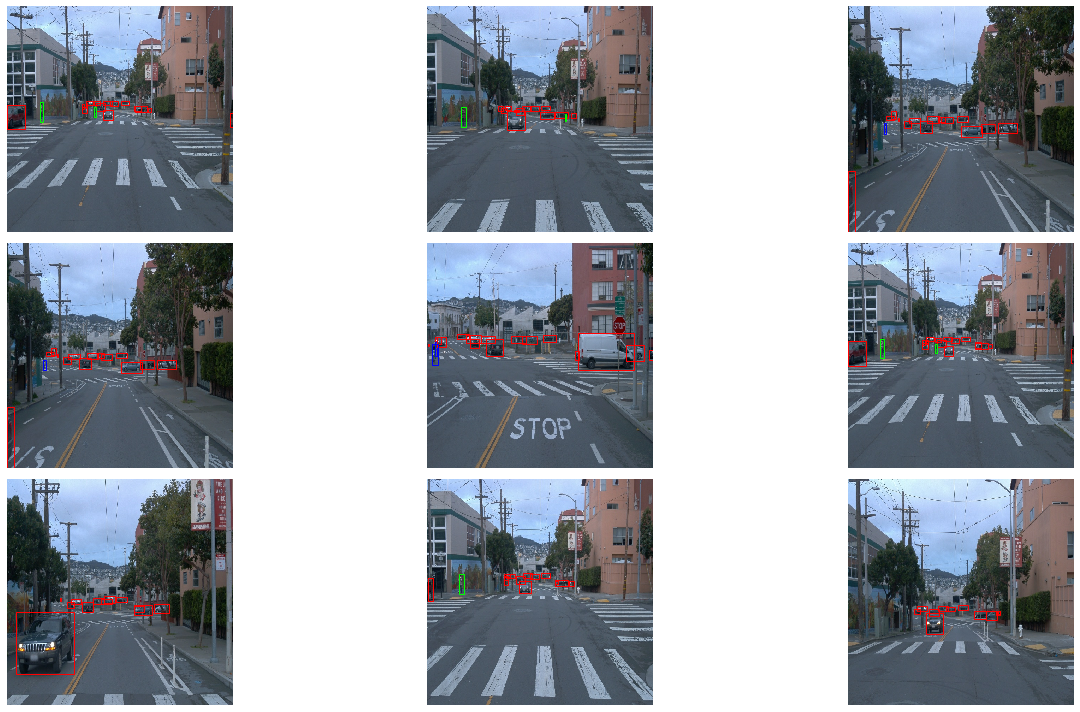

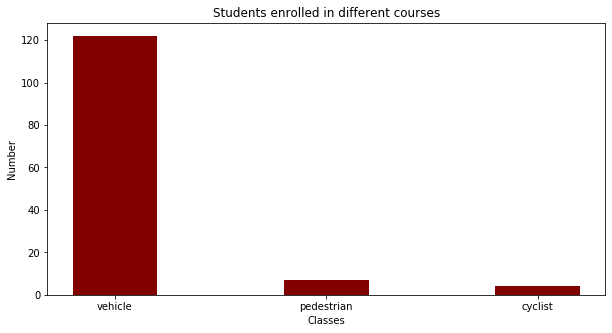

In [47]:
%matplotlib inline
import tensorflow as tf
dataset = dataset.shuffle(9)
display_instances(dataset.take(9))

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...